In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd

from scipy import ndimage

import contextily as cx

import matplotlib.pylab as pylab
import matplotlib

from shapely.geometry import Point
from shapely.geometry import LineString

from utils.gpdutils import generate_gpd, generate_lines,\
        generate_routine, adjust, generate_belonging_relations,\
        generate_buffers, print_belonging_relations
        
from utils.timeutils import time_transfer

In [2]:
gps = pd.read_csv('./data/gps/gps_0906.csv')
gps = time_transfer(gps)
gps = generate_gpd(gps, True)

In [3]:
# fig, ax = plt.subplots(figsize=(6,6),dpi=300)
# mapline.plot(ax = ax, color = 'r')
# routine.plot(ax = ax, color = 'b')
# ax.set_xlim((5400+1.349e7, 6500+1.349e7))
# ax.set_ylim((3.6822e6, 3.684e6))


In [4]:
# fig, ax = plt.subplots(figsize=(6,6),dpi=300)
# mapline.plot(ax = ax, color = 'orange')
# routine.plot(ax = ax, color = 'red', alpha = 0.4, markersize = 5)
# buffer.plot(ax = ax, color = 'blue', alpha=0.3)
# ax.set_xlim((5400+1.349e7, 6500+1.349e7))
# ax.set_ylim((3.6822e6, 3.684e6))


In [5]:
# from shapely.ops import nearest_points

In [6]:
mapdf = pd.read_excel('./data/map/map_up.xlsx')
mapdf = generate_gpd(mapdf, True)

In [7]:
routine = generate_routine(gps, 0, 0)
mapline = generate_lines(mapdf)
mapline = generate_buffers(mapline)

routine = generate_belonging_relations(routine, mapline)


In [8]:
routine.head(3)

,direction,vid,time,lon,lat,deadheading,month,day,geometry,belong
0,0,4,2021-09-06 05:53:34,121.250374,31.407167,0,9,6,POINT (13497529.892 3685741.193),[0]
1,0,4,2021-09-06 05:53:38,121.250400,31.407225,0,9,6,POINT (13497532.786 3685748.758),[0]
2,0,4,2021-09-06 05:53:44,121.250380,31.407220,0,9,6,POINT (13497530.560 3685748.106),[0]


In [9]:
print_belonging_relations(routine)

length of routine is: 444
well matched: 339
multiple mathed: 28
none matched: 77


In [10]:
# routine['adjusted'] = [adjust(routine.loc[_]) for _ in routine.index]

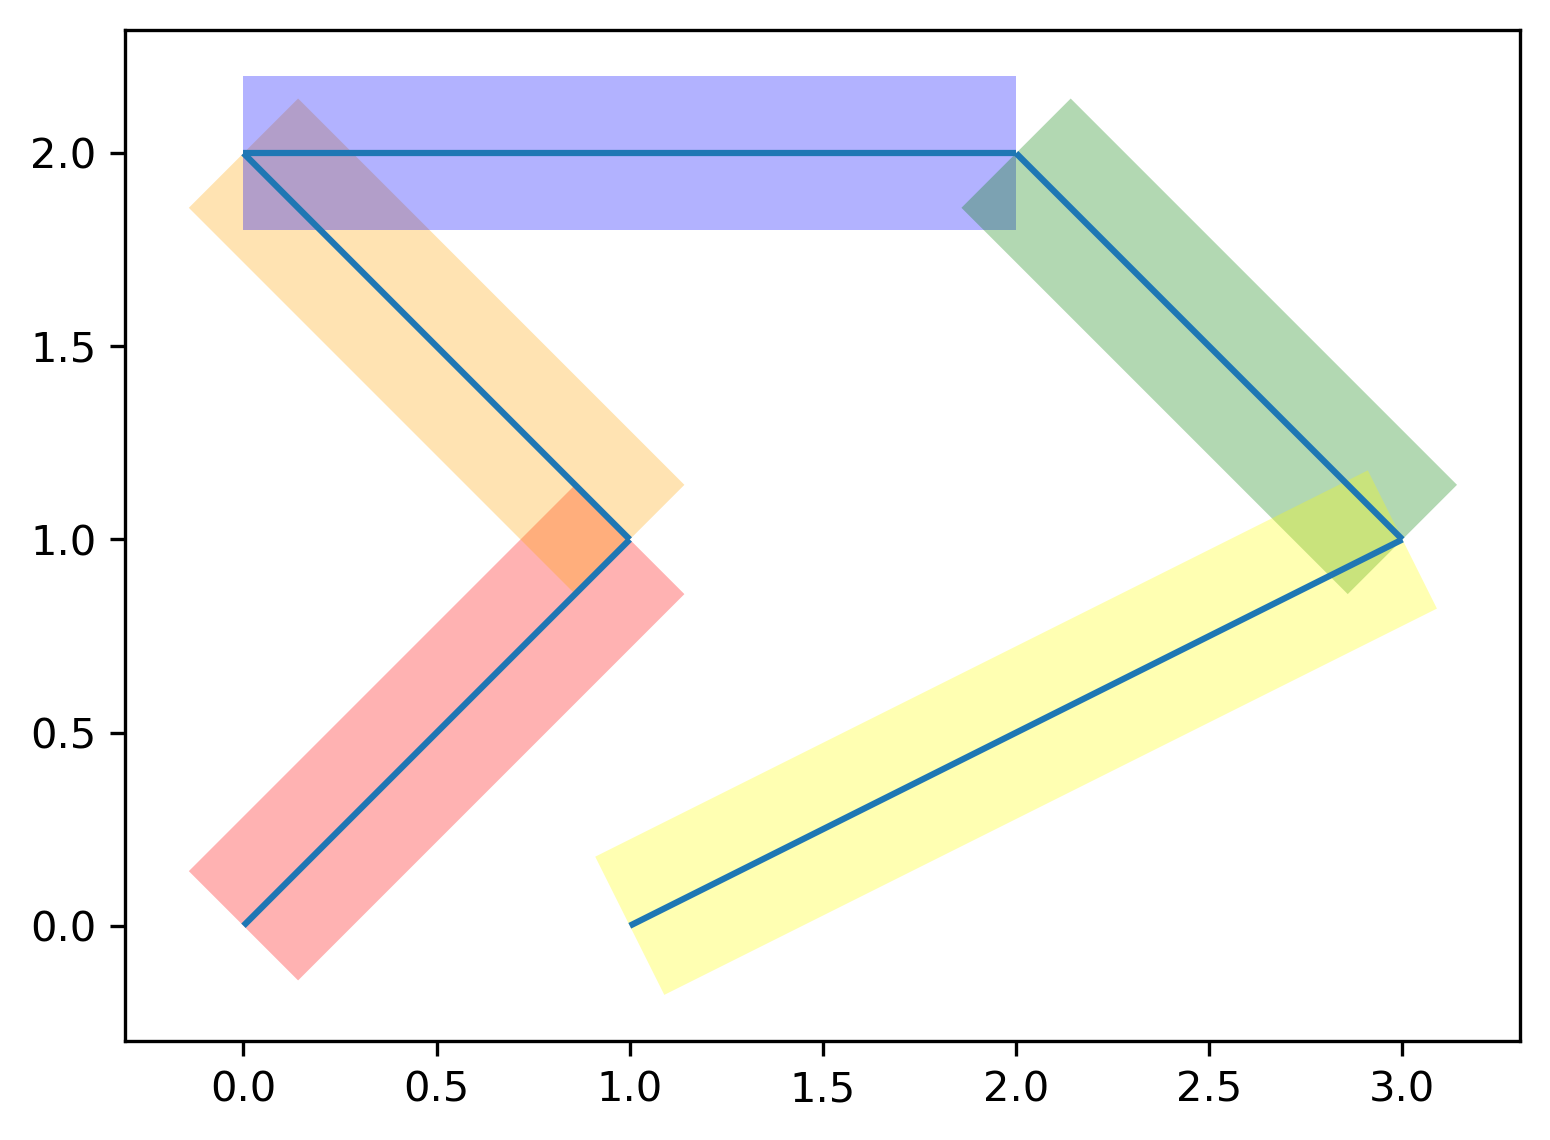

In [11]:
# testline = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
testlines = gpd.GeoSeries([LineString([(0, 0), (1, 1)]),
                            LineString([(1, 1), (0, 2)]),
                            LineString([(0, 2), (2, 2)]),
                            LineString([(2, 2), (3, 1)]),
                            LineString([(3, 1), (1, 0)])])
testbuffer = testlines.buffer(0.2, cap_style=2, join_style=2)
fig, ax = plt.subplots(figsize=(6,6),dpi=300)
gpd.GeoSeries(testlines).plot(ax = ax)
color = ['red','orange','blue','green','yellow']
for i in range(len(testbuffer)):
    gpd.GeoSeries(testbuffer[i]).plot(ax = ax, color = color[i], alpha=0.3)